Problem 2:

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [1]:
import time
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

In [2]:
# Get the nth fibonacci number with recursion.
# The 0th fibonacci number is 0, the 1st fibonacci number is 1.
# The nth fibonacci number is the n-1th fibonacci number + the n-2th fibonacci number.
def fibonacci(position):
    # Check if we are looking for the 0th or 1st fibonacci number.
    # If so, return the value
    if position <= 1:
        return position
    # Otherwise, calculate the value using the n-1 and n-2 fibonacci numbers
    else:
        return fibonacci(position-1) + fibonacci(position-2)

In [3]:
# Ask for the first 12 fibonacci numbers.
# The sequence on Prject Euler omits the 0th and 1st fibonacci numbers.
fibonacci_sequence = []
for i in range(12):
    fibonacci_sequence.append(fibonacci(i))

In [4]:
print(fibonacci_sequence[2:])

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


In [5]:
# We want to consider fibonacci numbers below 4,000,000
max_fibonacci = 4000000

# Variables to store results
# Sum of the even fibonacci numbers
even_sum = 0
# The fibonacci number calculated
result = 0
# The position of the fibonacci number
n=0

# Continue calculating the fibonacci numbers until we reach the max
while result < max_fibonacci:
    # If the fibonacci number is even, add it to our even sum
    if result % 2 == 0: even_sum += result
    # Move to the next fibonacci number
    n+=1
    result = fibonacci(n)
# Print result
print(even_sum)

4613732


In [6]:
# List of the max values we want to search up to.
max_fibonaccis = []

# Search in the range of X to Y
for e in range(2,7):
    for n in range(1,10):
        max_fibonaccis.append(n*10**e)

# Store calculation times for plotting
computation_times = []
# Perform same loop as above for each max search value
for max_fibonacci in max_fibonaccis:
    # Get the time at the start of the calculation
    start_time = time.time()
    
    # Calculation
    even_sum = 0
    result = 0
    n=0
    while result < max_fibonacci:
        if result % 2 == 0: even_sum += result
        n+=1
        result = fibonacci(n)
    
    # Get the time at the end of the calculation
    end_time = time.time()
    # Print result and timing info
    print(f"Sum of all the fibonacci numbers less than {max_fibonacci:,} = {even_sum}, computed in {end_time - start_time:.6f}s")
    # Record computation time
    computation_times.append(end_time - start_time)

Sum of all the fibonacci numbers less than 100 = 44, computed in 0.000000s
Sum of all the fibonacci numbers less than 200 = 188, computed in 0.000497s
Sum of all the fibonacci numbers less than 300 = 188, computed in 0.000000s
Sum of all the fibonacci numbers less than 400 = 188, computed in 0.000495s
Sum of all the fibonacci numbers less than 500 = 188, computed in 0.000496s
Sum of all the fibonacci numbers less than 600 = 188, computed in 0.000496s
Sum of all the fibonacci numbers less than 700 = 798, computed in 0.000992s
Sum of all the fibonacci numbers less than 800 = 798, computed in 0.000496s
Sum of all the fibonacci numbers less than 900 = 798, computed in 0.000991s
Sum of all the fibonacci numbers less than 1,000 = 798, computed in 0.001487s
Sum of all the fibonacci numbers less than 2,000 = 798, computed in 0.001984s
Sum of all the fibonacci numbers less than 3,000 = 3382, computed in 0.002976s
Sum of all the fibonacci numbers less than 4,000 = 3382, computed in 0.003473s
Sum

<Figure size 432x288 with 0 Axes>

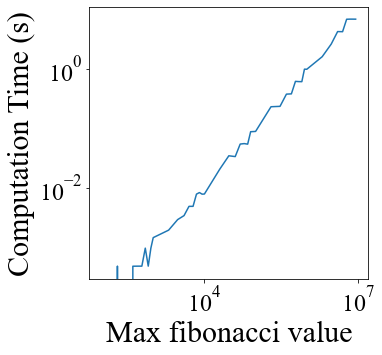

In [8]:
# Create plot of the computation time vs the max fibonacci value.
# Plotted on a log log scale, the line appears straight,
# making the computation O(N)

plt.clf()
fig = plt.figure(figsize=(5,5))

# Plot all results
plt.plot(max_fibonaccis, computation_times)

plt.yscale('log')
plt.xscale('log')

plt.ylabel('Computation Time (s)', fontsize=30)
plt.xlabel('Max fibonacci value', fontsize=30)

plt.tick_params(labelsize=24)

plt.show()

Search is O(N) but can be improved, we do not need to recalculate all the n-1 to 0 fibonacci numbers each time if we calculate the even_sum inside a loop.

In [9]:
# Get the even_sum of all fibonacci numbers below max_fibonacci with recursion.
def even_sum_fibonacci(max_fibonacci):
    f0=0
    f1=1
    even_sum=0
    while f0 < max_fibonacci:
        if f0 % 2 == 0: even_sum += f0
        f0, f1 = f1, f0+f1
    return even_sum

In [10]:
# List of the max values we want to search up to.
max_fibonaccis = [4000000]

# Search in the range of X to Y
for e in range(150,151):
    for n in range(1,10):
        max_fibonaccis.append(n*10**e)

# Store calculation times for plotting
computation_times = []
# Perform same loop as above for each max search value
for max_fibonacci in max_fibonaccis:
    # Get the time at the start of the calculation
    start_time = time.time()
    
    # Calculation
    even_sum = even_sum_fibonacci(max_fibonacci)
    
    # Get the time at the end of the calculation
    end_time = time.time()
    # Print result and timing info
    print(f"Sum of all the fibonacci numbers less than {max_fibonacci:,} = {even_sum}, computed in {end_time - start_time:.6f}s")
    # Record computation time
    computation_times.append(end_time - start_time)

Sum of all the fibonacci numbers less than 4,000,000 = 4613732, computed in 0.000000s
Sum of all the fibonacci numbers less than 1,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000 = 408882329188750643372675526899441637264503371614158050351909013551698742621286710639635812854617918591128221049658513384246553048989803428611920580240, computed in 0.000000s
Sum of all the fibonacci numbers less than 2,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000 = 1732053341241994164201459569694911230605823142077396363903382351888201153574051864010755210977365488410882385722003180975265336852771092195136066611280, computed in 0.000000s
Sum of all the fibonacci numbers less than 3,000,000,000,000,000,000,00

<Figure size 432x288 with 0 Axes>

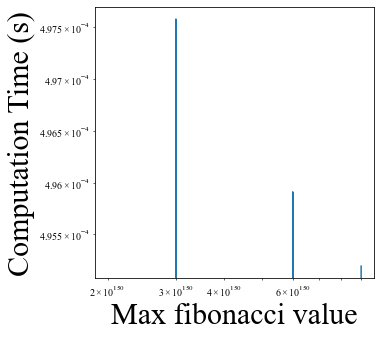

In [11]:
# Create plot of the computation time vs the max search integer.
# Plotted on a log log scale, the line appears straight,
# making the computation O(N)

plt.clf()
fig = plt.figure(figsize=(5,5))

# Plot all results above n=200 since the time recorded is 0.000000
plt.plot(max_fibonaccis[2:], computation_times[2:])

plt.yscale('log')
plt.xscale('log')

plt.ylabel('Computation Time (s)', fontsize=30)
plt.xlabel('Max fibonacci value', fontsize=30)

plt.tick_params(labelsize=24)

plt.show()

Now the calculation time is negligible for extremely large max values.

Problem 2 Solution: 4,613,732.